<a href="https://colab.research.google.com/github/SamTremblay18/Hockey-Shot-Classification/blob/main/CNN_Method1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Method 1 - Reframe to 576 frames and All Sensors Configuration

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import random
from google.colab import drive 
drive.mount('/content/drive')
import pickle
import matplotlib.pyplot as plt

from tensorflow import keras
from keras import layers 
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, Dropout, GlobalAveragePooling1D

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

Mounted at /content/drive


In [ ]:
def open_pickle(path_pickle):
  f = open(path_pickle, 'rb')
  P = pickle.load(f)
  f.close()

  return P

In [ ]:
X_test = open_pickle('/content/drive/MyDrive/Sam/File_saved/X_test1.pickle')
X_train = open_pickle('/content/drive/MyDrive/Sam/File_saved/X_train1.pickle')
y_test = open_pickle('/content/drive/MyDrive/Sam/File_saved/y_test1.pickle')
y_train = open_pickle('/content/drive/MyDrive/Sam/File_saved/y_train1.pickle')

#1 - Basic CNN model from Gab's first model

In [ ]:
model = models.Sequential()
model.add(layers.Conv1D(filters = 32, kernel_size = 9, activation='relu', input_shape=(X_train.shape[1:]),padding='same')) 
model.add(layers.MaxPooling1D(pool_size = 2))
model.add(layers.Conv1D(filters = 32, kernel_size = 9, activation='relu',padding='same'))
model.add(layers.Conv1D(filters = 32, kernel_size = 9, activation='relu',padding='same'))
model.add(layers.Flatten()) 
model.add(layers.Dense(32, activation='relu')) 
model.add(layers.Dense(7, activation='softmax')) 
model.compile(optimizer = 'rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs = 30, batch_size = 128, validation_data = (X_valid, y_valid))

Epoch 1/30
18/18 [==============================] - 11s 24ms/step - loss: 1.3887 - accuracy: 0.4985 - val_loss: 0.8260 - val_accuracy: 0.7176
Epoch 2/30
18/18 [==============================] - 0s 10ms/step - loss: 0.6325 - accuracy: 0.7527 - val_loss: 0.5595 - val_accuracy: 0.7735
Epoch 3/30
18/18 [==============================] - 0s 10ms/step - loss: 0.4559 - accuracy: 0.8250 - val_loss: 0.5277 - val_accuracy: 0.7735
Epoch 4/30
18/18 [==============================] - 0s 10ms/step - loss: 0.3852 - accuracy: 0.8585 - val_loss: 0.4917 - val_accuracy: 0.7912
Epoch 5/30
18/18 [==============================] - 0s 10ms/step - loss: 0.2888 - accuracy: 0.8968 - val_loss: 0.3692 - val_accuracy: 0.8412
Epoch 6/30
18/18 [==============================] - 0s 10ms/step - loss: 0.2395 - accuracy: 0.9177 - val_loss: 0.3942 - val_accuracy: 0.8441
Epoch 7/30
18/18 [==============================] - 0s 11ms/step - loss: 0.2198 - accuracy: 0.9164 - val_loss: 0.2909 - val_accuracy: 0.8941
Epoch 8/30
1

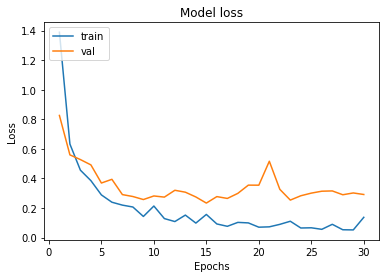

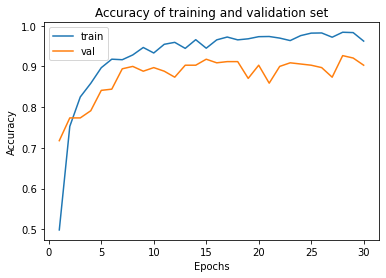

In [ ]:
#plot train/validation loss and train/validation accuracy 
history_dict = history.history
loss_values=history_dict['loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs,history_dict['loss'])
plt.plot(epochs, history_dict['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

accuracy_values = history_dict['accuracy']
val_accuracy= history_dict['val_accuracy']
plt.plot(epochs, accuracy_values)
plt.plot(epochs, val_accuracy)
plt.title('Accuracy of training and validation set') 
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 2 - CNN

In [ ]:
model = models.Sequential()
model.add(layers.Conv1D(filters = , kernel_size = , activation='relu', input_shape = (X_train.shape[1:])) 
model.add(layers.Conv1D(filters = , kernel_size = ,activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(filters = , kernel_size = , activation='relu'))
model.add(layers.Conv1D(filters = , kernel_size = , activation='relu'))
model_m.add(GlobalAveragePooling1D())
model_m.add(Dropout(0.5))
#model.add(layers.Flatten()) 
#model.add(layers.Dense(filters = , activation='relu')) 
model.add(layers.Dense(7, activation='softmax')) 
model.summary()

model.compile(optimizer = 'rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs = 50, batch_size = 128, validation_data = (X_valid, y_valid))

In [ ]:
#plot train/validation loss and train/validation accuracy 
history_dict = history.history
loss_values=history_dict['loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs,history_dict['loss'])
plt.plot(epochs, history_dict['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

accuracy_values = history_dict['accuracy']
val_accuracy= history_dict['val_accuracy']
plt.plot(epochs, accuracy_values)
plt.plot(epochs, val_accuracy)
plt.title('Accuracy of training and validation set') 
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 3 - Vaibhav's model

In [ ]:
def CNN_test(input_shape,output_shape):
    model = tf.keras.models.Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(output_shape, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

#4- Chollet basic CNN

In [ ]:
model = Sequential()
model.add(layers.Conv1D(32, 7, activation='relu', input_shape=(X_train.shape[1:]))) 
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu')) 
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(7))
model.summary()
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy',metrics=['accuracy']) 
history = model.fit(X_train, y_train,epochs=10, batch_size=128, validation_data = (X_valid, y_valid))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_16 (Conv1D)          (None, 570, 32)           11456     
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 114, 32)          0         
 1D)                                                             
                                                                 
 conv1d_17 (Conv1D)          (None, 108, 32)           7200      
                                                                 
 global_max_pooling1d_5 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_9 (Dense)             (None, 7)                 231       
                                                                 
Total params: 18,887
Trainable params: 18,887
Non-trai

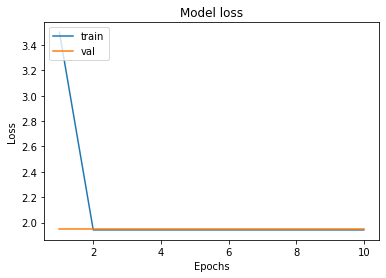

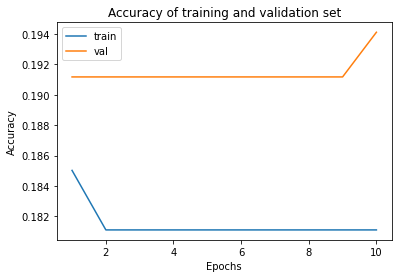

In [ ]:
#plot train/validation loss and train/validation accuracy 
history_dict = history.history
loss_values=history_dict['loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs,history_dict['loss'])
plt.plot(epochs, history_dict['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

accuracy_values = history_dict['accuracy']
val_accuracy= history_dict['val_accuracy']
plt.plot(epochs, accuracy_values)
plt.plot(epochs, val_accuracy)
plt.title('Accuracy of training and validation set') 
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#5 - Chollet's CNN, adding softmax activation 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 570, 32)           11456     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 114, 32)          0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 108, 32)           7200      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 18,887
Trainable params: 18,887
Non-trai

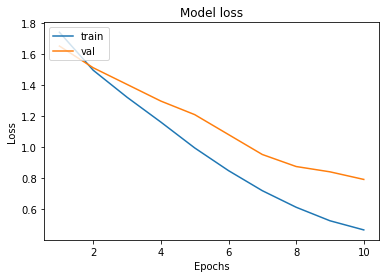

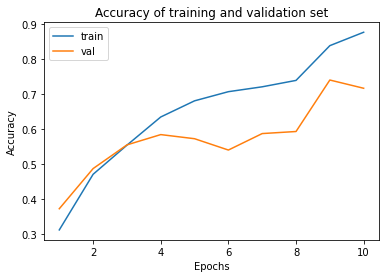

In [ ]:
model = Sequential()
model.add(layers.Conv1D(32, 7, activation='relu', input_shape=(X_train.shape[1:]))) 
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu')) 
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(7, activation='softmax'))
model.summary()
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy',metrics=['accuracy']) 
history = model.fit(X_train, y_train,epochs=10, batch_size=128, validation_data = (X_valid, y_valid))

history_dict = history.history
loss_values=history_dict['loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs,history_dict['loss'])
plt.plot(epochs, history_dict['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

accuracy_values = history_dict['accuracy']
val_accuracy= history_dict['val_accuracy']
plt.plot(epochs, accuracy_values)
plt.plot(epochs, val_accuracy)
plt.title('Accuracy of training and validation set') 
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 6- CNN from scratch by hfawaz (keras)

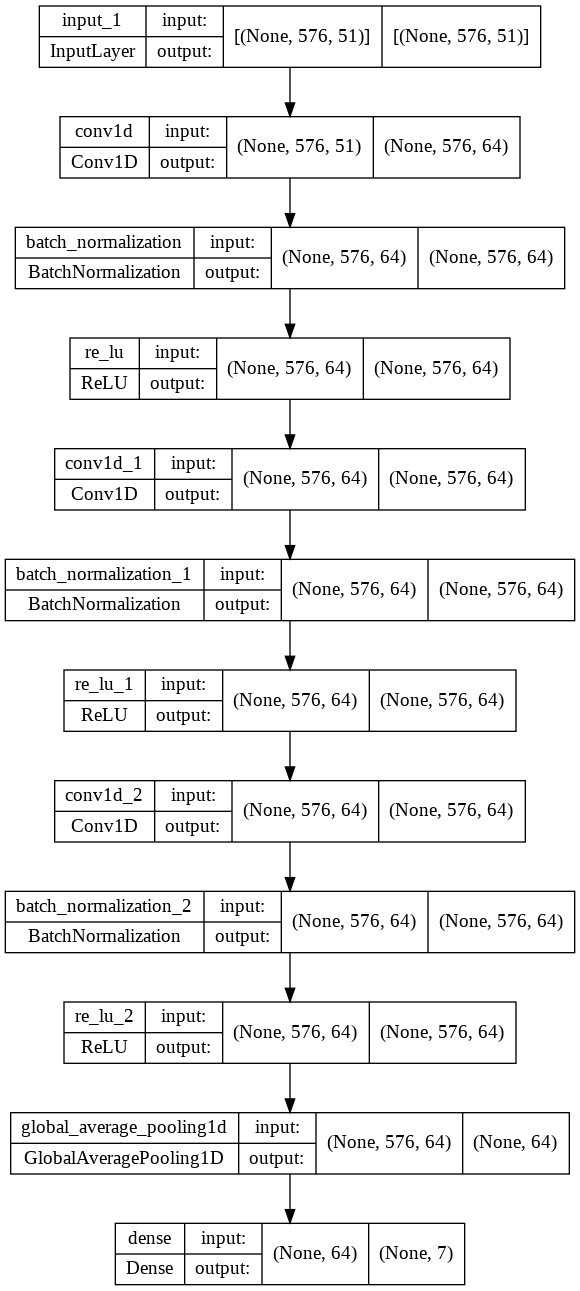

In [ ]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(7, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=X_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500
67/67 [==============================] - 10s 13ms/step - loss: 1.2025 - sparse_categorical_accuracy: 0.6158 - val_loss: 1.2630 - val_sparse_categorical_accuracy: 0.7175 - lr: 0.0010
Epoch 2/500
67/67 [==============================] - 1s 8ms/step - loss: 0.7524 - sparse_categorical_accuracy: 0.8249 - val_loss: 0.7531 - val_sparse_categorical_accuracy: 0.8023 - lr: 0.0010
Epoch 3/500
67/67 [==============================] - 1s 8ms/step - loss: 0.5593 - sparse_categorical_accuracy: 0.8508 - val_loss: 0.5135 - val_sparse_categorical_accuracy: 0.8701 - lr: 0.0010
Epoch 4/500
67/67 [==============================] - 1s 8ms/step - loss: 0.4419 - sparse_categorical_accuracy: 0.8847 - val_loss: 0.3864 - val_sparse_categorical_accuracy: 0.9115 - lr: 0.0010
Epoch 5/500
67/67 [==============================] - 1s 8ms/step - loss: 0.3720 - sparse_categorical_accuracy: 0.9054 - val_loss: 0.3312 - val_sparse_categorical_accuracy: 0.9266 - lr: 0.0010
Epoch 6/500
67/67 [===================

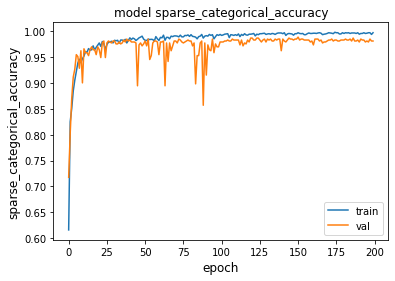

In [ ]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()